Archivo jupyter con preprocesamiento de datos y modelo de entrenamiento


In [1]:
#| export
from fastai.vision.all import *

import timm
from fastai.vision.widgets import *

transforms = aug_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

rodajas_augmentation = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label, #etiquetamos segun el nombre de la carpeta que los contiene
    item_tfms=Resize(128),
    batch_tfms=transforms,
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

In [2]:

#timm.list_models() #modelos disponibles

En la siguiente celda creamos los directorios

In [3]:
!mkdir data_etiquetada
!mv dataset/PlanoX/RotacionXY/Angulo0 data_etiquetada/PlanoX_0
!mv dataset/PlanoY/RotacionXY/Angulo0 data_etiquetada/PlanoY_0
!mv dataset/PlanoZ/RotacionXY/Angulo0 data_etiquetada/PlanoZ_0

mkdir: cannot create directory ‘data_etiquetada’: File exists
mv: cannot stat 'dataset/PlanoX/RotacionXY/Angulo0': No such file or directory
mv: cannot stat 'dataset/PlanoY/RotacionXY/Angulo0': No such file or directory
mv: cannot stat 'dataset/PlanoZ/RotacionXY/Angulo0': No such file or directory


In [4]:
#| export
data_loader_rodajas = rodajas_augmentation.dataloaders("data_etiquetada/")

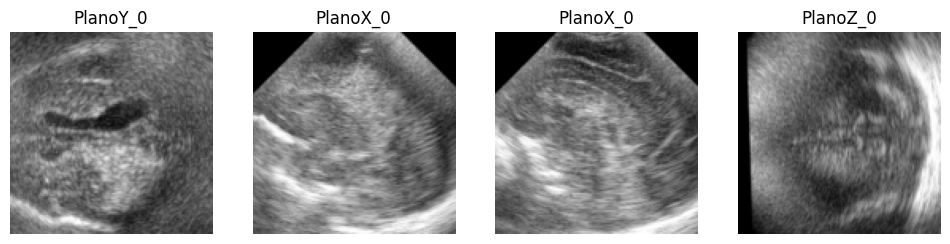

In [5]:
#| export
data_loader_rodajas.valid.show_batch(max_n=4, nrows=1)

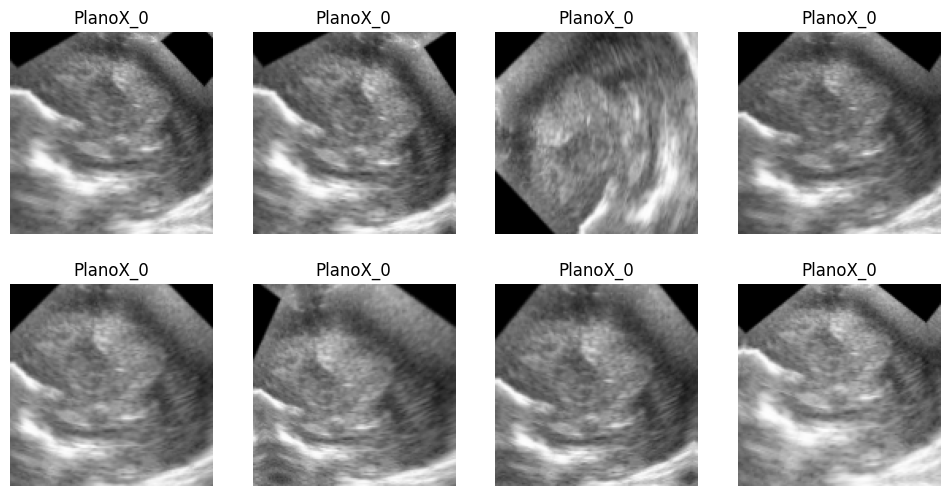

In [6]:
data_loader_rodajas.train.show_batch(max_n=8, nrows=2, unique=True)

visualizamos el modelo entrenado para ver donde se confunde más y comete errores

In [ ]:
# | export
learn = vision_learner(data_loader_rodajas, "convnext_tiny_in22k", metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.127425,2.259332,0.344262,00:39


epoch,train_loss,valid_loss,error_rate,time
0,0.203651,0.187969,0.106557,00:57


In [ ]:
# | export
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# | export
interp.plot_top_losses(4,figsize=(10, 10))

In [ ]:
# | export
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
!pip install -Uqq fastai

In [ ]:
# | export
learn.export("modelo_0.pkl")

In [ ]:
#learn.predict(im)
#learn.model